In [117]:
# ВСЕ САМОЕ НЕОБХОДИМОЕ
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека дл работы с табличками
from scipy import stats    # модуль для работы со статистикой
from scipy.stats import norm

# библиотеки для визуализации и картинок
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.style.use('ggplot')    # можно выбрать для графиков свой любимый стиль
%matplotlib inline 
sns.set_theme(style="darkgrid", palette="pastel")

import random
import math

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import linregress

#МО
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, fbeta_score, mean_absolute_error # метрики качества


# После получения необходимых данных:

### *Снова подгрузим наши таблички и проведем необходимые преобразования для дальнейшей удобной работы с ними!*

In [2]:
df_btc_ftrs = pd.read_csv('btc_ftrs_table.csv',  index_col=0) # таблица с ценами фьючерса на биткоин

In [3]:
# изменяем тип данных в столбце Date
df_btc_ftrs['Date']=pd.to_datetime(df_btc_ftrs['Date'])

In [4]:
df_btc_ftrs['Vol.']=df_btc_ftrs['Vol.'].astype(str) 
df_btc_ftrs['Vol.']=df_btc_ftrs['Vol.'].str.slice(stop=-1) #удаляем последний элемент К

df_btc_ftrs['Change']=df_btc_ftrs['Change'].astype(str)
df_btc_ftrs['Change']=df_btc_ftrs['Change'].str.slice(stop=-1) #удаляем последний элемент %
df_btc_ftrs['Vol.']= pd.to_numeric(df_btc_ftrs['Vol.'], errors='coerce', downcast='float')#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
df_btc_ftrs['Change']= pd.to_numeric(df_btc_ftrs['Change'], errors='coerce', downcast='float')
# errors='coerce' чтобы в случае неудавшегося преобразования получалось NaN
df_btc_ftrs = df_btc_ftrs.rename(columns={'Vol.': 'Volume, thous.'})
df_btc_ftrs = df_btc_ftrs.rename(columns={'Change': 'Change, %'})

In [5]:
df_btc_ftrs.to_csv('btc_ftrs_table_obr.csv') #сохраняем в csv файл УЖЕ ОБРАБОТАННУЮ ТАБЛИЦУ

In [6]:
df_btc_ftrs.head(10)

,Date,Price,Open,High,Low,"Volume, thous.","Change, %"
0,2023-04-28,29177.5,29655.0,29705.0,28890.0,0.85,-1.73
1,2023-04-27,29690.0,28670.0,29920.0,28210.0,11.29,6.42
2,2023-04-26,27900.0,28320.0,30050.0,27250.0,14.87,1.07
3,2023-04-25,27605.0,27450.0,28070.0,27195.0,7.93,0.75
4,2023-04-24,27400.0,27425.0,28010.0,26980.0,7.46,-1.31
5,2023-04-23,27765.0,29422.5,29422.5,27575.0,NaN,1.67
6,2023-04-21,27310.0,28240.0,28360.0,27195.0,6.27,-2.79
7,2023-04-20,28095.0,29195.0,29255.0,27985.0,7.61,-4.00
8,2023-04-19,29265.0,30435.0,30520.0,29010.0,7.62,-3.50
9,2023-04-18,30325.0,29555.0,30590.0,29145.0,5.58,2.62


In [7]:
df_btc_ftrs.isnull().sum()

Date                0
Price               0
Open                0
High                0
Low                 0
Volume, thous.    333
Change, %           0
dtype: int64

In [8]:
df_btc_ftrs.describe()

,Price,Open,High,Low,"Volume, thous.","Change, %"
count,1649.000000,1649.000000,1649.000000,1649.000000,1316.000000,1649.000000
mean,20628.682596,20636.985992,21198.626380,20008.691571,6.452685,0.131504
std,16626.640043,16630.931722,17092.827244,16111.240016,4.376165,4.218347
min,3145.000000,3180.000000,3187.500000,3120.000000,0.300000,-23.490000
25%,7950.000000,7965.000000,8200.000000,7715.000000,3.420000,-1.840000
50%,11655.000000,11630.000000,11950.000000,11340.000000,5.625000,0.030000
75%,31820.000000,31760.000000,32925.000000,30280.000000,8.527500,2.210000
max,67625.000000,67670.000000,69355.000000,66480.000000,44.900002,25.450001


In [9]:
mean_values = df_btc_ftrs.mean() # заполнили пропуски по объему средними значениями, поскольку если данные за какой-то день отсутствуют, то, скорее всего, тогда не было каких-то значительных скачков, которые необходимо зафиксировать, следовательно, заполнение средним вполне адекватно 
df_btc_ftrs = df_btc_ftrs.fillna(mean_values)

In [10]:
df_btc = pd.read_csv('btc_usd_table.csv',  index_col=0) # таблица с ценами самого биткоина с Binance

In [11]:
# изменяем тип данных в столбце Date
df_btc['Date']=pd.to_datetime(df_btc['Date'])

In [12]:
df_btc['Vol.']=df_btc['Vol.'].astype(str) 
df_btc['Vol.']=df_btc['Vol.'].str.slice(stop=-1) #удаляем последний элемент К

df_btc['Change']=df_btc['Change'].astype(str)
df_btc['Change']=df_btc['Change'].str.slice(stop=-1) #удаляем последний элемент %
df_btc['Vol.']= pd.to_numeric(df_btc['Vol.'], errors='coerce', downcast='float')#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
df_btc['Change']= pd.to_numeric(df_btc['Change'], errors='coerce', downcast='float')
# errors='coerce' чтобы в случае неудавшегося преобразования получалось NaN
df_btc = df_btc.rename(columns={'Vol.': 'Volume, thous.'})
df_btc = df_btc.rename(columns={'Change': 'Change, %'})

In [13]:
df_btc.head(10)

,Date,Price,Open,High,Low,"Volume, thous.","Change, %"
0,2023-04-28,29311.7,29485.6,29584.5,28919.4,54.299999,-0.55
1,2023-04-27,29472.8,28407.7,29854.8,28390.6,95.440002,3.70
2,2023-04-26,28420.3,28302.8,29996.2,27302.3,129.229996,0.43
3,2023-04-25,28297.8,27510.9,28373.7,27200.0,52.320000,2.87
4,2023-04-24,27508.7,27583.9,27977.2,27058.8,53.110001,-0.30
5,2023-04-23,27590.6,27814.6,27814.6,27387.2,34.820000,-0.80
6,2023-04-22,27812.9,27263.0,27870.0,27171.2,36.049999,2.02
7,2023-04-21,27262.8,28240.4,28354.1,27171.1,77.680000,-3.46
8,2023-04-20,28240.4,28796.0,29078.9,28036.5,76.900002,-1.97
9,2023-04-19,28809.1,30371.7,30404.7,28632.5,86.559998,-5.17


In [14]:
df_btc.isnull().sum()

Date              0
Price             0
Open              0
High              0
Low               0
Volume, thous.    0
Change, %         0
dtype: int64

In [15]:
df_btc.describe()

,Price,Open,High,Low,"Volume, thous.","Change, %"
count,1944.000000,1944.000000,1944.000000,1944.00000,1944.000000,1944.000000
mean,20555.177984,20551.279990,21045.012706,20012.40679,81.739388,0.114830
std,16509.186364,16514.252519,16909.550891,16072.61457,89.305367,3.855625
min,3212.700000,3209.800000,3265.000000,3158.00000,5.500000,-38.759998
25%,7934.375000,7942.575000,8152.225000,7727.35000,33.539999,-1.570000
50%,11619.350000,11618.050000,11873.200000,11340.15000,50.230000,0.060000
75%,31701.750000,31716.925000,32511.775000,30392.25000,84.792501,1.775000
max,67520.000000,67531.300000,69000.000000,66323.90000,760.570007,19.340000


In [16]:
df_sp500_ftrs =  pd.read_csv('ftrs_sp500_table.csv',  index_col=0) # таблиа с ценами фьючерса на s&p 500

In [17]:
# изменяем тип данных в столбце Date
df_sp500_ftrs['Date']=pd.to_datetime(df_sp500_ftrs['Date'])

In [18]:
#в столбце с объемами сделок, присутствуют и тысячи и миллионы, но нужно избавиться от обозначений и привести все к единому виду
for i in range(len(df_sp500_ftrs['Vol.'])):
    if df_sp500_ftrs['Vol.'][i][-1] == 'K':
        df_sp500_ftrs['Vol.'][i] = df_sp500_ftrs['Vol.'][i][:-1]
    elif df_sp500_ftrs['Vol.'][i][-1] == 'M':
        df_sp500_ftrs['Vol.'][i] = str(float(df_sp500_ftrs['Vol.'][i][:-1]) * 1000)

df_sp500_ftrs['Change']=df_sp500_ftrs['Change'].astype(str)
df_sp500_ftrs['Change']=df_sp500_ftrs['Change'].str.slice(stop=-1) #удаляем последний элемент %
df_sp500_ftrs['Vol.']= pd.to_numeric(df_sp500_ftrs['Vol.'], errors='coerce', downcast='float')#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
df_sp500_ftrs['Change']= pd.to_numeric(df_sp500_ftrs['Change'], errors='coerce', downcast='float')
# errors='coerce' чтобы в случае неудавшегося преобразования получалось NaN
df_sp500_ftrs = df_sp500_ftrs.rename(columns={'Vol.': 'Volume, thous.'})
df_sp500_ftrs = df_sp500_ftrs.rename(columns={'Change': 'Change, %'})

In [19]:
df_sp500_ftrs.head(10)

,Date,Price,Open,High,Low,"Volume, thous.","Change, %"
0,2023-04-28,4188.50,4151.00,4193.75,4131.50,1750.0,0.84
1,2023-04-27,4153.75,4085.50,4166.50,4080.75,1690.0,1.91
2,2023-04-26,4076.00,4110.25,4116.25,4068.75,1810.0,-0.42
3,2023-04-25,4093.25,4157.25,4158.50,4091.50,1770.0,-1.59
4,2023-04-24,4159.50,4150.00,4164.25,4133.50,1330.0,0.07
5,2023-04-21,4156.75,4153.75,4161.00,4135.25,1650.0,0.10
6,2023-04-20,4152.50,4172.25,4173.50,4137.00,1770.0,-0.62
7,2023-04-19,4178.50,4176.00,4187.50,4150.50,1290.0,-0.04
8,2023-04-18,4180.00,4177.00,4198.25,4164.50,1430.0,0.08
9,2023-04-17,4176.75,4174.25,4180.50,4148.00,1300.0,0.31


In [20]:
df_sp500_ftrs.to_csv('sp500_ftrs_table_obr.csv') #сохраняем в csv файл УЖЕ ОБРАБОТАННУЮ ТАБЛИЦУ

In [21]:
df_sp500_ftrs.isnull().sum()

Date               0
Price              0
Open               0
High               0
Low                0
Volume, thous.    58
Change, %         58
dtype: int64

In [22]:
df_sp500_ftrs.describe()

,Price,Open,High,Low,"Volume, thous.","Change, %"
count,1423.000000,1423.000000,1423.000000,1423.000000,1365.000000,1365.000000
mean,3492.174139,3490.595671,3517.692143,3461.935538,1549.109741,0.040484
std,664.373104,665.461740,667.810827,661.551111,656.384827,1.340603
min,2220.500000,2220.250000,2349.380000,2174.000000,6.030000,-10.380000
25%,2861.875000,2859.625000,2884.250000,2837.125000,1180.000000,-0.500000
50%,3377.500000,3372.000000,3392.500000,3347.750000,1490.000000,0.080000
75%,4090.875000,4095.000000,4123.750000,4059.000000,1880.000000,0.690000
max,4786.000000,4785.250000,4808.250000,4770.500000,5720.000000,9.800000


In [23]:
df_sp500_ftrs['Change, %'] = df_sp500_ftrs['Change, %'].fillna(value=0) # пропуски в процентных изменениях заменяем на нули, ведь сам прочерк по смыслу означает, что измененений в цене просто не было

In [24]:
mean_values = df_sp500_ftrs.mean() # заполнили пропуски по объему средними значениями
df_sp500_ftrs = df_sp500_ftrs.fillna(mean_values)

# Что за переменные в наших таблицах?



- `Date` - день, в который взята цена фьючерса (в таблице указан ежедневный таймфрейм) 
- `Price` - конечная цена фьючерса, которая установилась за день 
- `Open` - начальная цена фьючерса за день
- `High` - максимальная цена за день
- `Low` - минимальная цена за день
- `Volume, thous.` - общая стоимость всех транзакций по фьючерсу за последние 24 часа в USD на Binance (или количество сделок???)
- `Change, %` - процентное изменение цены фьючерса за день

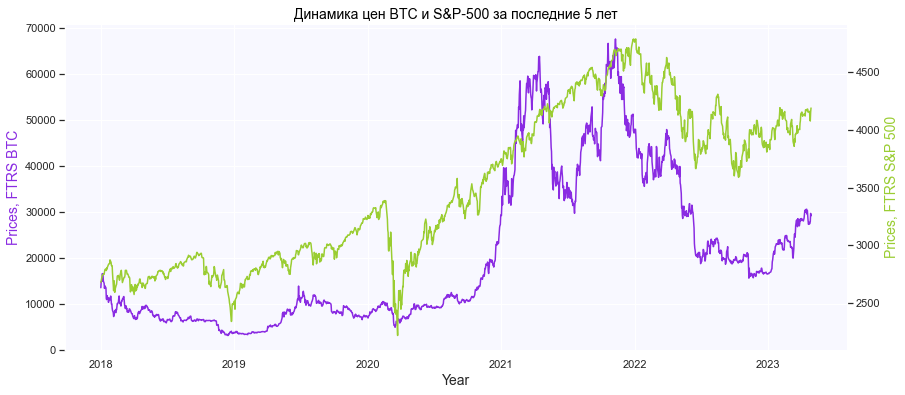

In [25]:
# https://www.dmitrymakarov.ru/data-analysis/eda-04-03/#7-predely-shkaly-i-deleniya-osey-grafika
# https://www.codecamp.ru/blog/matplotlib-two-y-axes/

# используемые цвета
col1 = '#8A2BE2'
col2 = '#9ACD32'

fig,ax = plt.subplots(figsize=(14,6))

# рисуем первый график
ax.plot(df_btc_ftrs['Date'] , df_btc_ftrs['Price'] , color=col1,  linewidth= 1.5 )

#подписываем название оси ОХ
ax.set_xlabel('Year', fontsize= 14 )

#подписываем название оси ОУ для первого объекта
ax.set_ylabel('Prices, FTRS BTC', color=col1, fontsize= 14 )
ax.set_title('Динамика цен BTC и S&P-500 за последние 5 лет', color='black', fontsize= 14 )
# добавляем еще один объект, который будет иметь ту же самую ось ОХ, но другую ось ОУ
ax2 = ax.twinx ()

#рисуем второй график
ax2.plot(df_sp500_ftrs['Date'] , df_sp500_ftrs['Price'] , color=col2, linewidth= 1.5 )

# подписываем название оси ОУ для второго объекта
ax2.set_ylabel('Prices, FTRS S&P 500', color=col2, fontsize= 14 )

ax2.grid(False) # удаляем сетку для второго объекта
ax.set_facecolor('#F8F8FF') # изменить цвет на белый;

#####  Посмотрим на распределение цен двух финансовых инструментов:

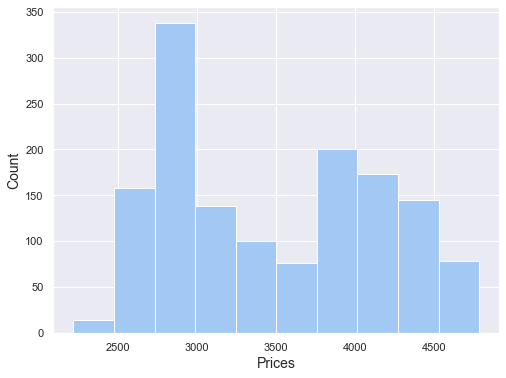

In [26]:
# распределение цен фьючерсов на S&P 500
plt.figure(figsize=(8,6))
df_sp500_ftrs['Price'].hist()
plt.xlabel('Prices', fontsize=14)
plt.ylabel('Count', fontsize=14);

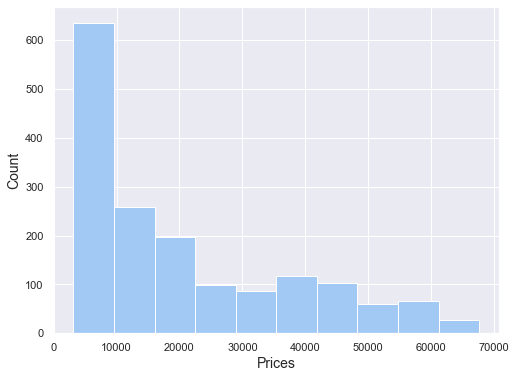

In [27]:
# распределение цен фьючерсов на Bitcoin
plt.figure(figsize=(8,6))
df_btc_ftrs['Price'].hist()
plt.xlabel('Prices', fontsize=14)
plt.ylabel('Count', fontsize=14);

##### Попробуем выяснить, как связаны объем торгов и изменение цен:

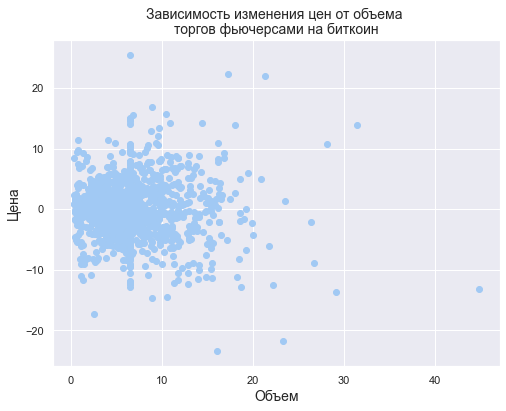

In [28]:
# Scatter plot для фьючерсов на биткоин
plt.figure(figsize=(8,6))
plt.scatter(df_btc_ftrs['Volume, thous.'], df_btc_ftrs['Change, %'])
plt.xlabel('Объем',  fontsize=14)
plt.ylabel('Цена',  fontsize=14)
plt.title('Зависимость изменения цен от объема \nторгов фьючерсами на биткоин',  fontsize=14);

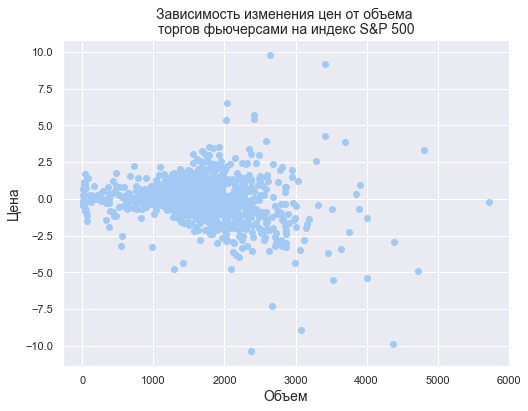

In [29]:
# Scatter plot для фьючерсов на индекс S&P 500
plt.figure(figsize=(8,6))
plt.scatter(df_sp500_ftrs['Volume, thous.'], df_sp500_ftrs['Change, %'])
plt.xlabel('Объем',  fontsize=14)
plt.ylabel('Цена',  fontsize=14)
plt.title('Зависимость изменения цен от объема \nторгов фьючерсами на индекс S&P 500',  fontsize=14);

* *Как видно, четкой взаимосвязи нет, поскольку выбранные финансовые инструменты имеют широкий вторичный рынок, и в среднем рост объема торгов никак не определяет их цены, однако также ярко заметны выбросы, которые, возможно, показывают всплески актиности по тем или иным внешним причинам, которые, как нам кажется, можно рассмотреть на отдельных графиках!*

##### Соотношение объемов и изменения цен, если говорить о фьючерсах на Bitcoin:

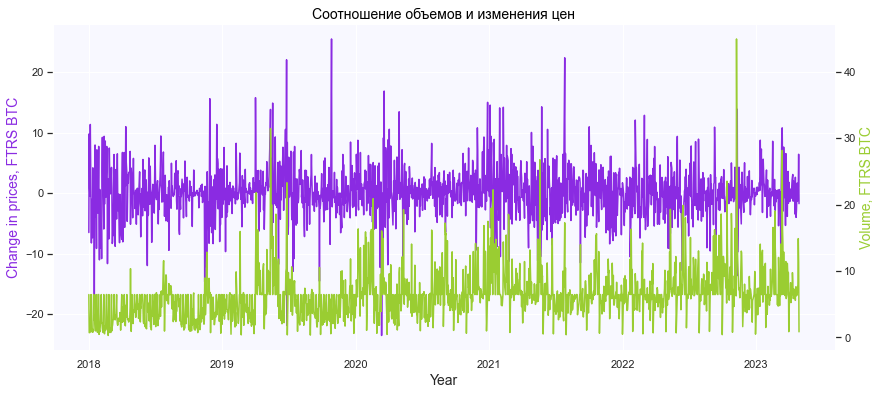

In [30]:
# используемые цвета
col1 = '#8A2BE2'
col2 = '#9ACD32'

fig,ax = plt.subplots(figsize=(14,6))

# рисуем первый график
ax.plot(df_btc_ftrs['Date'] , df_btc_ftrs['Change, %'] , color=col1,  linewidth= 1.5 )

#подписываем название оси ОХ
ax.set_xlabel('Year', fontsize= 14 )

#подписываем название оси ОУ для первого объекта
ax.set_ylabel('Change in prices, FTRS BTC', color=col1, fontsize= 14 )
ax.set_title('Соотношение объемов и изменения цен', color='black', fontsize= 14 )

# добавляем еще один объект, который будет иметь ту же самую ось ОХ, но другую ось ОУ
ax2 = ax.twinx ()

#рисуем второй график
ax2.plot(df_btc_ftrs['Date'] , df_btc_ftrs['Volume, thous.'] , color=col2, linewidth= 1.5 )

# подписываем название оси ОУ для второго объекта
ax2.set_ylabel('Volume, FTRS BTC', color=col2, fontsize= 14 )

ax2.grid(False) # удаляем сетку для второго объекта
ax.set_facecolor('#F8F8FF') # изменить цвет на белый;

In [31]:
# День с наибольшим изменением цены в фьючерсах на биткоин
max_change_day_btc = df_btc_ftrs.loc[df_btc_ftrs['Change, %'].idxmax(), 'Date']

print('День с наибольшим изменением цены в фьючерсах на биткоин:', max_change_day_btc)

День с наибольшим изменением цены в фьючерсах на биткоин: 2019-10-27 00:00:00


##### Соотношение объемов и изменения цен, если говорить о фьючерсах на S&P 500:

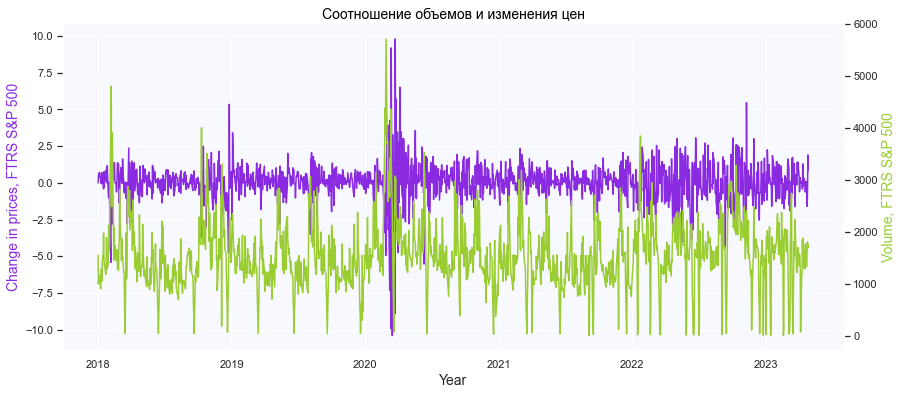

In [32]:
# используемые цвета
col1 = '#8A2BE2'
col2 = '#9ACD32'

fig,ax = plt.subplots(figsize=(14,6))

# рисуем первый график
ax.plot(df_sp500_ftrs['Date'] , df_sp500_ftrs['Change, %'] , color=col1,  linewidth= 1.5 )

#подписываем название оси ОХ
ax.set_xlabel('Year', fontsize= 14 )

#подписываем название оси ОУ для первого объекта
ax.set_ylabel('Change in prices, FTRS S&P 500', color=col1, fontsize= 14 )
ax.set_title('Соотношение объемов и изменения цен', color='black', fontsize= 14 )

# добавляем еще один объект, который будет иметь ту же самую ось ОХ, но другую ось ОУ
ax2 = ax.twinx ()

#рисуем второй график
ax2.plot(df_sp500_ftrs['Date'] , df_sp500_ftrs['Volume, thous.'] , color=col2, linewidth= 1.5 )

# подписываем название оси ОУ для второго объекта
ax2.set_ylabel('Volume, FTRS S&P 500', color=col2, fontsize= 14 )

ax2.grid(False) # удаляем сетку для второго объекта
ax.set_facecolor('#F8F8FF') # изменить цвет на белый;

In [33]:
# День с наибольшим изменением цены в фьючерсах на S&P 500
max_change_day_spx = df_sp500_ftrs.loc[df_sp500_ftrs['Change, %'].idxmax(), 'Date']

print('День с наибольшим изменением цены в фьючерсах на S&P 500:', max_change_day_spx)

День с наибольшим изменением цены в фьючерсах на S&P 500: 2020-03-24 00:00:00


### *Попробуем обнаружить связь между фондовым рынком (через цены фьючерсов на индекс S&P 500) и рынком криптовалют (через цены фьючерсов на Bitcoin):*

In [34]:
df_btc = pd.DataFrame() # пустой датафрейм для дальнейшего заполнения

In [35]:
df_sp500 = pd.DataFrame() # пустой датафрейм для дальнейшего заполнения

In [36]:
df_btc['Date']=df_btc_ftrs['Date']
df_btc['Price']=df_btc_ftrs['Price']

In [37]:
df_sp500['Date']=df_sp500_ftrs['Date']
df_sp500['Price']=df_sp500_ftrs['Price']

In [38]:
df_btc.head() # табличка с ценами фьючерсов на биткоин

,Date,Price
0,2023-04-28,29177.5
1,2023-04-27,29690.0
2,2023-04-26,27900.0
3,2023-04-25,27605.0
4,2023-04-24,27400.0


In [39]:
df_sp500.head() # табличка с ценами фьючерсов на s&p 500

,Date,Price
0,2023-04-28,4188.50
1,2023-04-27,4153.75
2,2023-04-26,4076.00
3,2023-04-25,4093.25
4,2023-04-24,4159.50


***Соединим две таблицы, используя объединение по колонке, что позволит избежать пропусков и, соответственно, не испортит корреляцию:***

In [40]:
df_result = pd.DataFrame() # пустой датафрейм для дальнейшего заполнения

In [41]:
df_result=df_sp500.merge(df_btc, on='Date')

In [42]:
# изменение названий колонок
df_result = df_result.rename(columns={'Price_x': 'Price, FTRS S&P500', 'Price_y': 'Price, FTRS BTC'})

In [43]:
df_result.isnull().sum()

Date                  0
Price, FTRS S&P500    0
Price, FTRS BTC       0
dtype: int64

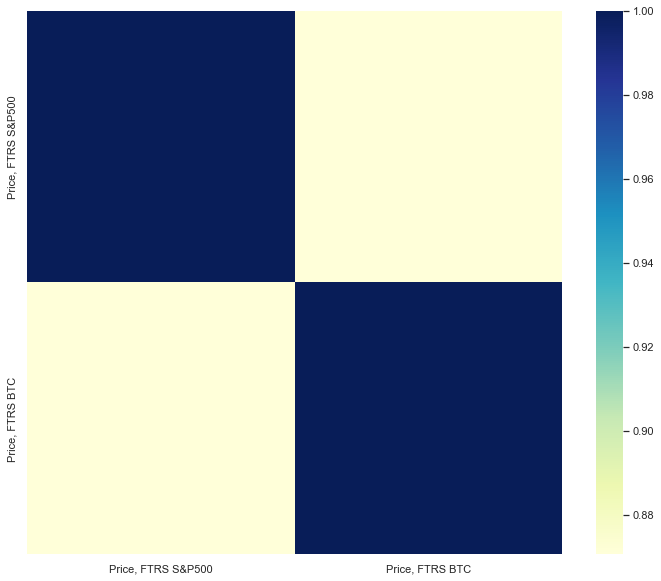

In [44]:
# тепловая карта для корреляционной матрицы цен финансовых инструментов
plt.figure(figsize = (12,10))
matrix_corr=df_result.corr()
sns.heatmap(matrix_corr, cmap='YlGnBu');

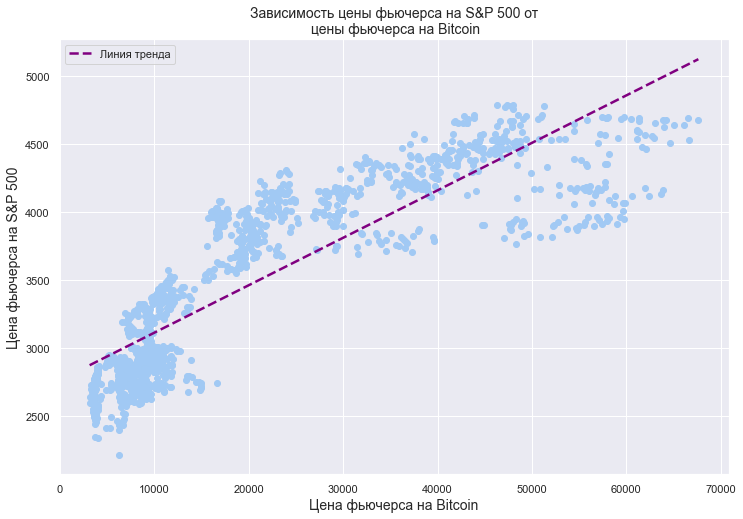

In [45]:
# Зависимость цены фьючерса на S&P 500 от цены фьючерса на Bitcoin
plt.figure(figsize=(12, 8))
plt.scatter(df_result['Price, FTRS BTC'], df_result['Price, FTRS S&P500'])
plt.xlabel('Цена фьючерса на Bitcoin', fontsize= 14)
plt.ylabel('Цена фьючерса на S&P 500', fontsize= 14)
plt.title('Зависимость цены фьючерса на S&P 500 от\n цены фьючерса на Bitcoin', fontsize= 14)

# Добавление линии тренда
# https://www.codecamp.ru/blog/matplotlib-trendline/
coefficients = np.polyfit(df_result['Price, FTRS BTC'], df_result['Price, FTRS S&P500'], 1)
polynomial = np.poly1d(coefficients)
x = np.linspace(df_result['Price, FTRS BTC'].min(), df_result['Price, FTRS BTC'].max(), 100)
plt.plot (x, polynomial(x), color = "purple", linewidth = 2.5 , linestyle = "--", label='Линия тренда')
# Отображение графика
plt.legend();

# Coming Soon...

### *Какие у нас есть гипотезы или что планируем сделать?*

* Цена фьючерса на Биткоин и цена фьючерса на индекс S&P-500 не связаны. Используем для проверки гипотезы линейную регрессию и такой алгоритм машинного обучения, как случайный лес; 
* Объем торгов фьючерса на Биткоин и объем торгов фьючерса на S&P 500 не связаны. Используем для проверки гипотезы линейную регрессию и такой алгоритм машинного обучения, как случайный лес;

## Проверим гипотезу о том, что фондовый рынок и рынок криптовалют движутся совместно:

* *До этого мы обнаружили сильную положительную связь, построив корреляционную матрицу, а теперь проверим, является ли эта связь статистически значимой (на уровне значимости 5%)?*

* ***H0: Цена фьючерса на Bitcoin и цена фьючерса на индекс S&P-500 не связаны;***

In [46]:
df_result.head(10) #все та же таблица, что и для построения корреляционной матрицы

,Date,"Price, FTRS S&P500","Price, FTRS BTC"
0,2023-04-28,4188.50,29177.5
1,2023-04-27,4153.75,29690.0
2,2023-04-26,4076.00,27900.0
3,2023-04-25,4093.25,27605.0
4,2023-04-24,4159.50,27400.0
5,2023-04-21,4156.75,27310.0
6,2023-04-20,4152.50,28095.0
7,2023-04-19,4178.50,29265.0
8,2023-04-18,4180.00,30325.0
9,2023-04-17,4176.75,29550.0


In [47]:
alpha=0.05
result = linregress(df_result['Price, FTRS S&P500'],df_result['Price, FTRS BTC'])
print('Нулевая гипотеза отвергается, т.к. p-value =', result.pvalue, 'гораздо меньше, чем уровень значимости alpha =', alpha )

Нулевая гипотеза отвергается, т.к. p-value = 0.0 гораздо меньше, чем уровень значимости alpha = 0.05


## Проверим гипотезу о том, что объемы торгов на фондовом рынке коррелируют с объемами на рынке криптовалют: 
* *Если в тот или иной момент активность торгов `одним типом активов` снижается, то можно смело говорить о том, что трейдеры по каким-то причинам "переключаются" на `другой`?*
* ***H0: Объем торгов фьючерса на Биткоин и объем торгов фьючерса на S&P 500 не связаны;***
* *Для проверки гипотезы необходимо создать переменную, которая будет показывать изменения в объемах;*

### Создадим новую переменную "`Volume BTC, change`" и "`Volume SP500, change`" :

In [68]:
df_sp500_ftrs_reversed=df_sp500_ftrs.iloc[::-1] # перевернем табличку
df_btc_ftrs_reversed=df_btc_ftrs.iloc[::-1] # перевернем табличку

In [78]:
VolumeSP500 =(np.log(df_sp500_ftrs_reversed['Volume, thous.'])-np.log(df_sp500_ftrs_reversed['Volume, thous.'].shift(1)))*100
VolumeBTC =(np.log(df_btc_ftrs_reversed['Volume, thous.'])-np.log(df_btc_ftrs_reversed['Volume, thous.'].shift(1)))*100

In [98]:
df_sp500_ftrs_reversed['Volume SP500, change,%'] = VolumeSP500 # добавили столбик sp500
df_sp500_ftrs_reversed2=df_sp500_ftrs_reversed.iloc[::-1] # снова перевернули
df_sp500_ftrs_reversed2['Volume SP500, change,%']=df_sp500_ftrs_reversed2['Volume SP500, change,%'].fillna(np.mean(df_sp500_ftrs_reversed2['Volume SP500, change,%']))

df_btc_ftrs_reversed['Volume BTC, change,%'] = VolumeBTC # добавили столбик btc
df_btc_ftrs_reversed2=df_btc_ftrs_reversed.iloc[::-1]
df_btc_ftrs_reversed2['Volume BTC, change,%'] = df_btc_ftrs_reversed2['Volume BTC, change,%'].fillna(np.mean(df_btc_ftrs_reversed2['Volume BTC, change,%']))

In [97]:
df_sp500_ftrs_reversed2.head(10)

,Date,Price,Open,High,Low,"Volume, thous.","Change, %","Volume SP500, change,%"
1413,2018-01-12,2788.75,2768.75,2790.00,2766.75,1360.000000,0.70,25.869465
1414,2018-01-11,2769.50,2750.00,2770.50,2747.75,1050.000000,0.69,-20.585203
1415,2018-01-10,2750.50,2749.75,2752.00,2736.50,1290.000000,-0.06,12.361383
1416,2018-01-09,2752.25,2746.50,2760.00,2742.75,1140.000000,0.20,23.246336
1417,2018-01-08,2746.75,2741.75,2748.50,2736.50,903.539978,0.15,-23.246336
1418,2018-01-05,2742.50,2725.00,2743.25,2723.75,1140.000000,0.69,-2.597570
1419,2018-01-04,2723.75,2710.25,2729.00,2708.50,1170.000000,0.47,5.264378
1420,2018-01-03,2711.00,2693.75,2714.25,2692.25,1110.000000,0.67,10.809708
1421,2018-01-02,2693.00,2675.25,2696.00,2674.50,996.270020,0.46,-44.141724
1422,2018-01-01,2680.75,2675.75,2681.00,2674.75,1549.109741,0.00,0.008575


In [87]:
df_btc_ftrs_reversed2.head(10)

,Date,Price,Open,High,Low,"Volume, thous.","Change, %","Volume BTC, change,%"
0,2023-04-28,29177.5,29655.0,29705.0,28890.0,0.850000,-1.73,-258.643616
1,2023-04-27,29690.0,28670.0,29920.0,28210.0,11.290000,6.42,-27.542854
2,2023-04-26,27900.0,28320.0,30050.0,27250.0,14.870000,1.07,62.869286
3,2023-04-25,27605.0,27450.0,28070.0,27195.0,7.930000,0.75,6.109762
4,2023-04-24,27400.0,27425.0,28010.0,26980.0,7.460000,-1.31,14.505899
5,2023-04-23,27765.0,29422.5,29422.5,27575.0,6.452685,1.67,2.872002
6,2023-04-21,27310.0,28240.0,28360.0,27195.0,6.270000,-2.79,-19.368696
7,2023-04-20,28095.0,29195.0,29255.0,27985.0,7.610000,-4.00,-0.131297
8,2023-04-19,29265.0,30435.0,30520.0,29010.0,7.620000,-3.50,31.158745
9,2023-04-18,30325.0,29555.0,30590.0,29145.0,5.580000,2.62,-21.233261


In [99]:
#снова смерджим таблицы, потому что sp500 не торгуется по выходным, а нам нужны общие дни торговли
df_result2 = pd.DataFrame() # пустой датафрейм для дальнейшего заполнения
df_result2 = df_sp500_ftrs_reversed2.merge(df_btc_ftrs_reversed2, on='Date')
df_result2.head()

,Date,Price_x,Open_x,High_x,Low_x,"Volume, thous._x","Change, %_x","Volume SP500, change,%",Price_y,Open_y,High_y,Low_y,"Volume, thous._y","Change, %_y","Volume BTC, change,%"
0,2023-04-28,4188.50,4151.00,4193.75,4131.50,1750.0,0.84,3.488731,29177.5,29655.0,29705.0,28890.0,0.85,-1.73,-258.643616
1,2023-04-27,4153.75,4085.50,4166.50,4080.75,1690.0,1.91,-6.859827,29690.0,28670.0,29920.0,28210.0,11.29,6.42,-27.542854
2,2023-04-26,4076.00,4110.25,4116.25,4068.75,1810.0,-0.42,2.234697,27900.0,28320.0,30050.0,27250.0,14.87,1.07,62.869286
3,2023-04-25,4093.25,4157.25,4158.50,4091.50,1770.0,-1.59,28.580093,27605.0,27450.0,28070.0,27195.0,7.93,0.75,6.109762
4,2023-04-24,4159.50,4150.00,4164.25,4133.50,1330.0,0.07,-21.559668,27400.0,27425.0,28010.0,26980.0,7.46,-1.31,14.505899


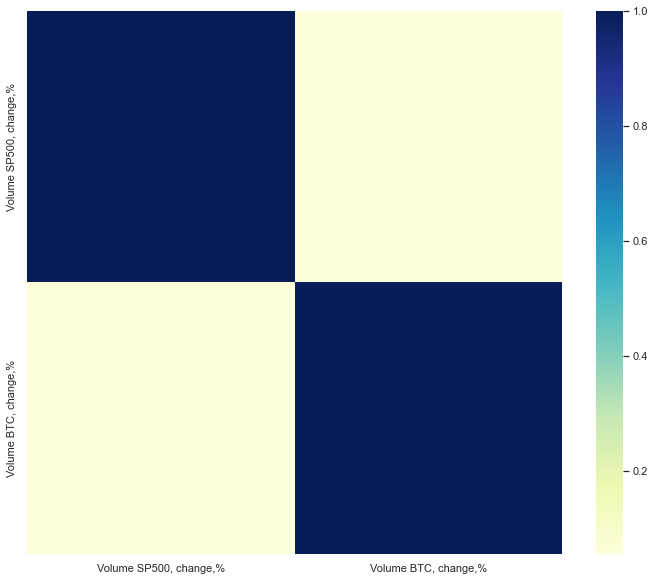

In [100]:
# тепловая карта для корреляционной матрицы цен финансовых инструментов
plt.figure(figsize = (12,10))
matrix_corr=df_result2[['Volume SP500, change,%', 'Volume BTC, change,%']].corr()
sns.heatmap(matrix_corr, cmap='YlGnBu');

* *как видно из корреляционной матрицы, связи между данными показателеми не присутствует!*
* ***докажем статистическую значимость полученного результата!***

In [102]:
alpha=0.05
result = linregress(df_result2['Volume SP500, change,%'],df_result2['Volume BTC, change,%'])
print('Нулевая гипотеза отвергается, т.к. p-value =', result.pvalue, 'меньше, чем уровень значимости alpha =', alpha )

Нулевая гипотеза отвергается, т.к. p-value = 0.04200834515460739 меньше, чем уровень значимости alpha = 0.05


* Получается, на уровне значимости 5% мы отвергаем нулевую гипотезу об отсутствии связи, однако можно однозначно сделать вывод о том, что какой-то ярковыраженной линенйной связи между двумя показателями в долгосрочной перспективе точно нет, однако нельзя отрицать, что под воздействием каких-то экономических шоков данная зависимость вполне имеет право на существование!

# *Теперь с помощью алгоритма "случайного леса":*
Попробуем обучить модель так, чтобы показатели, измеренные для одного инструмента (Bitcoin), помогали предсказывать возможную цену на другой инструмент (S&P 500):

In [107]:
#используем таблицу df_result2, т. к. в ней собрана вся необходимая информация
# волатильность битка (колонка с процентным изменением цены Change), изменения в объемах его торгов и его цена "открытия" будут использованы для предсказания цены SP500
features_btc = ['Open_y','Volume BTC, change,%','Change, %_y']
X = df_result2[features_btc]
y = df_result2['Price_x']

#разделим на train и test
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.2, random_state=15)

In [115]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor(n_estimators=100)
model_rfr.fit(train_X, train_y)

y_pred = model_rfc.predict(test_X)

In [122]:
MAE_model = mean_absolute_error(test_y, y_pred)
print("MAE:", MAE_model)

MAE: 141.95896134751777


#### *Мини-вывод:*
*В целом, результат относительно неплохой, учитывая, что цена измеряется в тысячах, однако, недостаточно хороший для использования в реальной торговле :( Возможно, стоило бы предсказывать именно волатильность нашего инструмента, однако для этого нужны более сложные модели (GARCH/ARCH) с задействованием более глубоких знаний (мы вроде как их только на 3 курсе сможем получить, познав эконометрику и временные ряды).*